In [1]:
import pandas as pd
import re
import keyword
from IPython.display import clear_output
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import f1_score
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


### Importing code samples

Extracting code chunks with comments.

In [2]:
code = pd.read_csv('code_blocks_final_clean.csv')
code = code['code_block'].to_frame()
idx = code['code_block'].str.contains("#") | (code['code_block'].str.contains("'''") & (code['code_block'].str.count("'''") % 2 == 0))
commented_code = code[idx].reset_index()
commented_code

,index,code_block
0,50,\nimport numpy as np \nimport pandas as pd \ni...
1,86,'''\nThis is my implementation for this tutori...
2,168,\nimport numpy as np \nimport pandas as pd \np...
3,216,\nimport numpy as np \nimport pandas as pd \ni...
4,278,\nimport numpy as np \nimport pandas as pd \ni...
5,293,\nimport numpy as np \nimport pandas as pd \n'...
6,419,class LinearActiv(chainer.Chain):\n '''line...
7,469,class Head(torch.nn.Module):\n def __init__...
8,916,three_tables_query = '''\n ...
9,917,all_users_query = '''\n SELEC...


### Preprocessing comments

In [3]:
def digits_portion(x):
    digits = ['0','1','2','3','4','5','6','7','8','9']
    s = 0
    for d in digits:
        s += x.count(d)
    return s / len(x)

def keywords_num(x):
    s = 0
    words = x.split()
    for k in keyword.kwlist:
        s += words.count(k)
    return s

def num_words(x):
    return len(x.split())

def escape_sequence(x):
    seqs = ['\n','\t']
    s = 0
    for i in seqs:
        s += x.count(i)
    return s
    
def can_compile(x):
    try:
        compile(x, "bogusfile.py", "exec")
        return 1
    except Exception as e:
        return 0

def brackets_num(x):
    symbols = ['(',')','[',']','{','}']
    s = 0
    for i in symbols:
        s += x.count(i)
    return s

def special_symbols(x):
    symbols = ['!','@','$','%','^','&','*','-','+','~','/','|','\\']
    s = 0
    for i in symbols:
        s += x.count(i)
    return s

def uppercase_partion(x):
    s = 0
    for i in x:
        s += 1 if (('A' <= i) and (i <='Z')) else 0
    return s / len(x)

def lowercase_partion(x):
    s = 0
    for i in x:
        s += 1 if (('a' <= i) and (i <='z')) else 0
    return s / len(x)
    
vdp = np.vectorize(digits_portion)
vlen = np.vectorize(len)
vkn = np.vectorize(keywords_num)
vnw = np.vectorize(num_words)
vcc = np.vectorize(can_compile)
ves = np.vectorize(escape_sequence)
vbn = np.vectorize(brackets_num)
vss = np.vectorize(special_symbols)
vup = np.vectorize(uppercase_partion)
vlp = np.vectorize(lowercase_partion)

def preprocess_comments(ar):
    prepr_funcs = [vdp, vlen, vkn, vnw, vcc, ves, vbn, vss, vup, vlp]
    num = ar.shape[0]

    prepr_columns = []

    for f in prepr_funcs:
        prepr_columns.append(f(ar).reshape([1,num]))

    return np.concatenate(prepr_columns).T

In [6]:
# model = CatBoostClassifier()
# model.load_model("is_comment.cbm")

def all_occur(text, substr):
    return [m.start() for m in re.finditer(substr, text)]

def greater_than_in(value ,l, if_none):
    try:
        return next(y[1] for y in enumerate(l) if y[1] > value)
    except:
        return if_none

def max_less(value ,l, if_none):
    try:
        return max([x for x in l if x < value])
    except:
        return if_none

# проверка строки на наличие комментария
def is_comment(text):
    return True
#     comment = preprocess_comments(np.array([text]))
#     pred = model.predict(comment)
#     return pred[0] == 1

def change_position(code, code_new, ar):
    dif = len(code) - len(code_new)
    ar = [pos - dif for pos in ar]
    return ar

def trim_symbols(code_chunk):
    code = code_chunk['code_block']
    
    patern1 = r"(#\s*)+"
    patern2 = r"[#]+"
    
    p1 = re.compile(patern1)
    p2 = re.compile(patern2)
    
    code = p2.sub('#', p1.sub('#', code))
    
    # исправляем неправильно заданные многострочные комментарии
    code = code.replace("''''", "'''")
    
    # убираем последний символ - ','
    code = code[:-1]
    
    # для случаев '''code_chunk''' убираем скобочки
    if code.strip()[:3] == code.strip()[-3:]:
        code = code.strip()[3:-3]
    
    code_chunk['code_block'] = code
    return code_chunk
    
def single_lines(code_chunk):
    code = code_chunk['code_block']
    
    singles = all_occur(code, '#')
    newlines = all_occur(code, "\n")
    code_new = ""
    
    while len(singles) != 0:
        codelen = len(code)
        comment_start = singles.pop(0)
        
        comment_end = greater_than_in(comment_start, newlines, codelen)
        comment = code[comment_start:comment_end]
        
        prev_newline = max_less(comment_start, newlines, 0)
        before = code[prev_newline:comment_start]
        before_indent = before[:(len(before) - len(before.lstrip()))]
        before = before.strip()

        comment = code[comment_start:comment_end]
        
        # перемещаем однострочные комментарии, перед которыми есть код
        if (before != ""):
            # проверяем, чтобы # не содержался внутри строки
            # проверяем, чтобы # не был закоментирован
            if ((before.count("'") % 2 != 1) and
                (before.count('"') % 2 != 1) and
                (code[:comment_start].count("'''") %  2 != 1)):
                
                code_new = code[:prev_newline] + "\n'''\n" + comment[1:] + "\n'''" + \
                           before_indent + before + code[comment_end:]
                
                singles = change_position(code, code_new, singles)
                newlines = change_position(code, code_new, newlines)
                
                code = code_new
    
        # превращаем однострочные комментарии в начале строки в многострочные
        else:
            # проверяем, чтобы # не был закоментирован
            if (code[:comment_start].count("'''") %  2 != 1):
                code_new = code[:prev_newline] + "\n'''\n" + comment[1:] + "\n'''" + \
                               before_indent + before + code[comment_end:]
                singles = change_position(code, code_new, singles)
                newlines = change_position(code, code_new, newlines)
                code = code_new

    code_chunk['code_block'] = code
    return code_chunk

def multiple_lines(code_chunk):
    code = code_chunk['code_block']
    
    code_new = ""
    
    multiples = all_occur(code, "'''")
    
    # объединение соседних комментов
#     patern3 = r"'''(\n)*'''"
#     p3 = re.compile(patern3)
#     code = p3.sub('\n', code)
    
    code_chunk['code_block'] = code
    return code_chunk

def extract_comments(code_chunk):
    code = code_chunk['code_block']

    # добавляем комментарии в отдельный столбец
    comments = []
    multiples = all_occur(code, "'''")
    
    while len(multiples) > 0:
        comment_start = multiples.pop(0)
        comment_end = multiples.pop(0)
        comment = code[comment_start + 3:comment_end]
        
        code_new = code[:comment_start] + code[comment_end + 3:]
        multiples = change_position(code, code_new, multiples)
        code = code_new
        
        if (len(comment) > 0) and (is_comment(comment)):
            comments.append((comment_start, comment))
    
    code_chunk['code_block'] = code
    code_chunk['comments'] = comments
    
    return code_chunk

def purify(code_chunk):
    comments = code_chunk['comments']
    comments_new = []
    for com in comments:
        comment = com[1].replace('\n','')
        comment = comment.replace('\t',' ')
        comment = comment.strip()
        
        patern1 = r"\s+"
        p1 = re.compile(patern1)
    
        comment = p1.sub(' ', comment)
        if len(comment) > 0:
            comments_new.append((com[0], comment))
    code_chunk['comments'] = comments_new
    return code_chunk 

def create_description(code_chunk):
    description = ""
    description += "\n".join([com[1] for com in code_chunk['comments']])
    code_chunk['description'] = description
    return code_chunk

In [7]:
commented_code['comments'] = [[] for i in range(commented_code.shape[0])]
preprocessed = commented_code.apply(trim_symbols, axis=1)
preprocessed = preprocessed.apply(single_lines, axis=1)
preprocessed = preprocessed.apply(multiple_lines, axis=1)
# preprocessed = preprocessed.apply(purify, axis=1)
preprocessed = preprocessed.apply(extract_comments, axis=1)
descripted = preprocessed.apply(create_description, axis=1)

In [8]:
descripted = descripted[descripted['description'] != ''].reset_index().drop(columns=['level_0', 'comments'])

In [9]:
descripted.to_csv('code_blocks_descripted_check.csv')

### Разметка комментарием для обучения модели

y - хороший коммент, n - плохой, b - остановить разметку

In [10]:
comments = []
code_blocks = []
comments_pure = []

for i in range(preprocessed.shape[0]):
    code_blocks.append(preprocessed['code_block'][i])
    for com in preprocessed['comments'][i]:
        comments.append(com)
        comments_pure.append(com[1])

In [11]:
num = len(comments_pure)
is_comment = [-1 for i in range(num)]

done = 0
for i in range(num):
    if (is_comment[i] == -1):
        comment = comments_pure[i]
        print(i)
        print('done',done,'of',num)
        print(20*'_')
        print(comment)
        print(20*'_')
        print('is comment? y/n?')
        inp = input()[0]
        if (inp == 'b'):
            break
        inp = 1 if inp == 'y' else 0
        idxs = [j for j, x in enumerate(comments_pure) if x == comment]
        done += len(idxs)
        for idx in idxs:
            is_comment[idx] = inp
        clear_output()
        
        

17
done 30 of 8045
____________________

                  SELECT q.owner_user_id 
                  FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
                  WHERE EXTRACT(DATE FROM q.creation_date) = '2019-01-01'
                  UNION DISTINCT
                  SELECT a.owner_user_id
                  FROM `bigquery-public-data.stackoverflow.posts_answers` AS a
                  WHERE EXTRACT(DATE FROM a.creation_date) = '2019-01-01'
                  
____________________
is comment? y/n?
b


### Хороший комментарий это:
1. Кратко описывает одно, возможно сложное, действие
2. Не содержит ссылок
3. Не содержит кода или объяснения работы использованных функций
4. Не описывает входные и выходные переменные
5. Не является кодом
6. На английском языке

Сохранение полученной разметки и предобработанных комментов.

In [12]:
import numpy as np

is_comment = np.array(is_comment)
comments = np.array(comments)

with open("is_comment.npy", "wb")as f:
    np.save(f, is_comment)
    
# with open("comments.npy", "wb")as f:
#     np.save(f, comments)

MemoryError: 

Загрузка разметки и предобработанных комментов из файла.

In [13]:
with open("is_comment.npy", "rb")as f:
    is_comment = np.load(f)
    
# with open("comments.npy", "rb")as f:
#     comments = np.load(f)

In [14]:
print(is_comment.shape)
comments = np.array(comments)
print(comments.shape)

(8045,)


MemoryError: 

## Обучение модели, определяющей хорошие комментарии

In [11]:
# число размеченных комментариев в выборке
num = 1062
X = preprocess_comments(np.array(comments_pure[:num]))
y = is_comment[:num]

In [12]:
X_unknown = preprocess_comments(np.array(comments_pure[num:]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
train_data = X_train
train_labels = y_train

model = CatBoostClassifier(iterations=150)
model.fit(train_data,
          train_labels,
          verbose=False)

In [15]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('f1 score:', f1)
print('accuracy:', acc)

f1 score: 0.9242416128255508
accuracy: 0.9287749287749287


Confusion matrix, without normalization


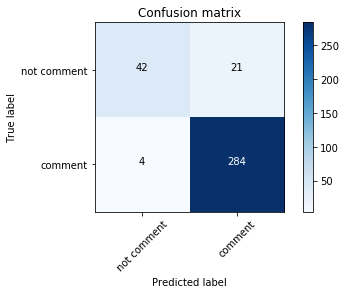

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_pred)

class_names = ['not comment', 'comment']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()

In [27]:
y_unknown_pred = model.predict(X_unknown)

In [28]:
j = 0
for i in range(num, len(comments_pure) - 1, 1):
    if y_unknown_pred[i - num] == 1:
        print(comments_pure[i + 1])
        print(20 * "_")
        j += 1
    if j >= 25:
        break

All the students are grouped in five due to race/ethnicity. The data includes the parental level of education of the whole students. Also math, reading, writing scores are listed for each individual. 
____________________

    Show chlonological change of the data.
    
____________________

    Remove all special character from text string
    
____________________

    Tokenize with NLTK
    Rules:
        - drop all words of 1 and 2 characters
        - drop all stopwords
        - drop all numbers
    
____________________

    Clean and tokenize text input
    
____________________
Grouping by match and groups
____________________
match rank
____________________
How dangerous is the coronavirus?
Covid-19 is deadly, although fatality rates skyrocket for the elderly and those with compromised immune systems.
How has the coronavirus affected you?
Well if you ask me personally, the outbreak of novel Coronavirus, has affected me significantly. Both in respect of career and in respect o

In [29]:
model.save_model('is_comment.cbm')